# Logistic regression Draft 1



## Looking at the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import csv
import math
# this line plots graphs in line
%matplotlib inline



In [2]:
import pandas as pd
import numpy as np

In [3]:
# Data set is containted in the same path, in the archive folder
dataset = pd.read_csv("archive/creditcard.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
dataset.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
temp_df_0 = dataset.loc[(dataset['Class'] == 0)]
temp_df_1 = dataset.loc[(dataset['Class'] == 1)]

# Just having a look

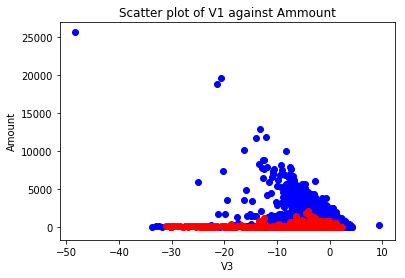

In [7]:
var = 'V3'
var2 = 'Amount'
NONF =plt.scatter(temp_df_0[var],temp_df_0[var2], marker='o', color = 'b' )
F =plt.scatter(temp_df_1[var],temp_df_1[var2], marker='o', color = 'r' )

plt.xlabel(var)
plt.ylabel(var2)
plt.title('Scatter plot of V1 against Ammount')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

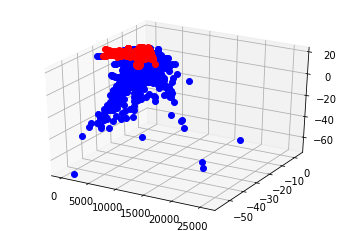

In [8]:
var = 'Amount'
var2 = 'V1'
var3 = 'V2'

data01 =temp_df_0[var]
data02 =temp_df_0[var2]
data03 =temp_df_0[var3]

data11 =temp_df_1[var]
data12 =temp_df_1[var2]
data13 =temp_df_1[var3]



fig=plt.figure()
ax = fig.add_subplot(111,projection="3d")



ax.plot(data01,data02,data03, 'bo')
ax.plot(data11,data12,data13, 'ro')
plt.show

In [134]:
def rands(row):
    if( row ==0):
        
        return  np.random.uniform(low=0, high=0.999)
    else:
        #print("0")
        return 0
    

In [156]:
np.random.seed(0)
dataset['rand'] =dataset.Class.apply(rands)
dataUnder = dataset.drop(dataset[(dataset.rand > 0.00167) ].index)


In [157]:
dataUnder=dataUnder.drop(['rand'], axis=1)

1    492
0    468
Name: Class, dtype: int64
as a percentage of the whole dataset
1    51.25
0    48.75
Name: Class, dtype: float64


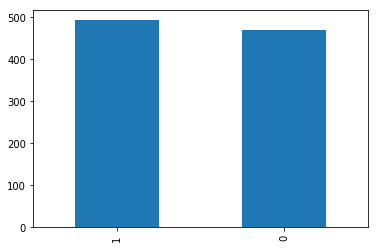

In [158]:
fig, ax = plt.subplots()
print(dataUnder.Class.value_counts())
print("as a percentage of the whole dataset")
print((dataUnder.Class.value_counts()*100)/ len(dataUnder))
dataUnder.Class.value_counts().plot(ax=ax, kind='bar')

In [159]:
dataUnderShuffled = dataUnder.sample(frac =1, random_state=1)

In [160]:
dataUnderShuffled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
53591,46057.0,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
245393,152733.0,0.017146,1.073396,-0.461297,-0.571219,0.928457,-0.733113,0.946607,-0.111614,0.045183,...,-0.323251,-0.829710,0.117723,0.494117,-0.445988,0.107508,0.090271,0.079033,3.87,0
116628,74363.0,-0.555274,-0.308632,0.942140,-1.112148,0.191309,0.200827,-0.452505,0.157107,-1.315644,...,0.249826,0.543696,-0.215531,-0.838230,-0.026151,-0.102272,-0.251391,0.113015,20.00,0
99198,67012.0,-1.297016,-2.144115,1.589930,-1.353052,1.096638,-0.425869,-0.274943,-1.037766,-1.548225,...,-0.533359,0.279059,0.205468,-0.742248,-0.343321,-0.154503,-0.613965,-0.675508,10.00,0
84543,60353.0,-3.975216,0.581573,-1.880372,4.319241,-3.024330,1.240793,-1.909559,0.660718,-2.752611,...,0.578984,1.397311,1.045322,-0.304000,0.005295,0.235435,0.962015,-0.673557,454.82,1


In [161]:
def sig_toGetProb(power):
    return 1/(1+ np.exp(-power))


## https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/pdfs/40%20LogisticRegression.pdf

In [16]:
#Trying it with no bias first

def ent_partial(X, Y,W, M):
    
    z = np.dot(W, X.T)
    #print("z")
    #print(z)
    #print(np.dot(X, W))
   #print(len(np.dot(X, W)))
    #z= 0
    #z+= np.dot(X, W)
    #print(np.shape(z))
    
    yPred= sig_toGetProb(z)
    #print ("yPred", yPred)

    
    dotSum = np.dot((Y - yPred), X)
    minus1OnM = -1 / M
    
    
    return minus1OnM*dotSum


### Grad Decent

In [17]:
def grad_decMACHINE(a, dataX, Y, W, iterations, M ):
    # a -> the learning rate
    # data -> containing a Class filed which is our Y. 
    # W starting wieghts
    # interations -> how many iterations of gradient decent will be used.

    # Performing Gradient Descent 
    for i in range(iterations):      
        W = W - (a*ent_partial(dataX, Y, W , M))

    return W

# Running 

In [254]:
data = dataUnderShuffled.to_numpy()
Split = 0.6
SplitPosition = int(len(data)*Split)

In [255]:
d_train= np.array(data[0:SplitPosition,:])
d_test = np.array(data[SplitPosition:,:])
print ('Shape of train = ',np.shape(d_train))
print ('Shape of test = ',np.shape(d_test))


Shape of train =  (576, 31)
Shape of test =  (384, 31)


In [256]:

(unique, counts) = np.unique(d_test[:, -1], return_counts=True)

frequencies = np.asarray((unique, counts)).T


print(frequencies)

[[  0. 184.]
 [  1. 200.]]


In [319]:
currentData = d_train
iterations = 1000000
M = len(currentData)
np.random.seed(0)
W = np.random.rand(np.shape(currentData)[1] -1)/100
#W= WFunc
print(W.shape)
print(W)
Y = currentData[:, -1]
X = currentData[:,:-1]
#print(np.shape(X))
#print(np.shape(W))


Weights = grad_decMACHINE(0.001, X, Y, W, iterations, M )

(30,)
[0.00548814 0.00715189 0.00602763 0.00544883 0.00423655 0.00645894
 0.00437587 0.00891773 0.00963663 0.00383442 0.00791725 0.00528895
 0.00568045 0.00925597 0.00071036 0.00087129 0.00020218 0.0083262
 0.00778157 0.00870012 0.00978618 0.00799159 0.00461479 0.00780529
 0.00118274 0.00639921 0.00143353 0.00944669 0.00521848 0.00414662]


/home/lara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [320]:
print(Weights)

[-2.64877513e+01 -1.22203869e+03  9.75831691e+02 -1.77273670e+03
  1.15107519e+03 -8.13871530e+02 -3.40899644e+02 -1.50505941e+03
  1.99175345e+01 -6.56530279e+02 -1.48626584e+03  9.60757087e+02
 -1.60711918e+03 -4.59101279e+01 -1.79083400e+03 -2.77655916e+01
 -1.06767237e+03 -1.75821061e+03 -5.94834671e+02  1.74534407e+02
  5.93480907e+01  2.48558921e+02 -1.60425324e+00 -1.17271263e+01
 -4.08055282e+01  7.23475262e+00  1.00705494e+01  4.00330865e+01
  2.97506228e+01  2.38546559e+03]


In [321]:
def prdictor(W,X):
    z = np.dot(W, X.T)
    #print("printing predicted zs before sig")
    #print(z)
    yPred= sig_toGetProb(z)
    print((yPred))
    #print("printing predicted zs after sig")
    #print(yPred)

    prediction = np.zeros(len(z))
    for i in range(len(z)):
        prediction[i] = (0 if sig_toGetProb(z[i])<0.5 else 1)
    
    return prediction
          


In [322]:
preditcted = prdictor(Weights,d_test[:,:-1])
#print(preditcted)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/home/lara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [327]:

(unique, counts) = np.unique(preditcted, return_counts=True)

frequencies = np.asarray((unique, counts)).T


print(frequencies)

[[  0. 369.]
 [  1.  15.]]


In [328]:
def acc(pred,act):
    countCorrect = 0
    for i in range(len(pred)):
        if(int(pred[i]) ==int(act[i])):
            countCorrect +=1
    return countCorrect/ len(pred)
        

In [329]:
accuraacy = acc(preditcted,d_test[:, -1])

In [330]:
print(accuraacy)

0.4765625


In [195]:
corMat =dataset.corr()


In [196]:
corMat[:2]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,rand
Time,1.000000,0.117396,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,0.000194
V1,0.117396,1.000000,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347,0.005730


In [197]:
d_test.shape

(384, 31)

In [236]:
currentData = d_train
iterations = 1000000
M = len(currentData)
W = np.random.rand(np.shape(currentData)[1] -1)
print(W)
Y = currentData[:, -1]
X = currentData[:,:-1]
print(X.shape)
print(d_test[:,:-1].shape)

[0.31720174 0.77834548 0.94957105 0.66252687 0.01357164 0.6228461
 0.67365963 0.971945   0.87819347 0.50962438 0.05571469 0.45115921
 0.01998767 0.44171092 0.97958673 0.35944446 0.48089353 0.68866118
 0.88047589 0.91823547 0.21682214 0.56518887 0.86510256 0.50896896
 0.91672295 0.92115761 0.08311249 0.27771856 0.0093567  0.84234208]
(576, 30)
(384, 30)


In [332]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, Y)
pred =clf.predict(d_test[:,:-1])





In [282]:
WFunc=clf.coef_
print(WFunc)

[[-1.95622185e-05 -3.06012345e-02  7.93895300e-02 -2.03730856e-01
   2.34048469e-01  5.64345040e-02 -3.95114476e-02 -6.90430106e-02
  -7.76679736e-02 -8.09009096e-02 -1.49830052e-01  9.45501480e-02
  -1.70110380e-01 -4.65316003e-02 -3.13551652e-01 -3.40284143e-02
  -5.49241313e-02 -6.78910373e-02  5.05833284e-03 -1.03166782e-02
  -2.46774350e-02  5.18837147e-02  1.16523230e-02 -3.48371380e-02
  -1.80904643e-02 -1.63879546e-02  6.68758140e-04  1.58360913e-02
   7.56915830e-03  1.32385682e-03]]


In [283]:
accuraacy = acc(pred,d_test[:, -1])

In [284]:
print(accuraacy)

0.90625


In [285]:
WFunc.shape =(30,)

In [286]:
WFunc

array([-1.95622185e-05, -3.06012345e-02,  7.93895300e-02, -2.03730856e-01,
        2.34048469e-01,  5.64345040e-02, -3.95114476e-02, -6.90430106e-02,
       -7.76679736e-02, -8.09009096e-02, -1.49830052e-01,  9.45501480e-02,
       -1.70110380e-01, -4.65316003e-02, -3.13551652e-01, -3.40284143e-02,
       -5.49241313e-02, -6.78910373e-02,  5.05833284e-03, -1.03166782e-02,
       -2.46774350e-02,  5.18837147e-02,  1.16523230e-02, -3.48371380e-02,
       -1.80904643e-02, -1.63879546e-02,  6.68758140e-04,  1.58360913e-02,
        7.56915830e-03,  1.32385682e-03])